In [1]:
import numpy as np
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model

In [3]:
from IPython.display import Image, display

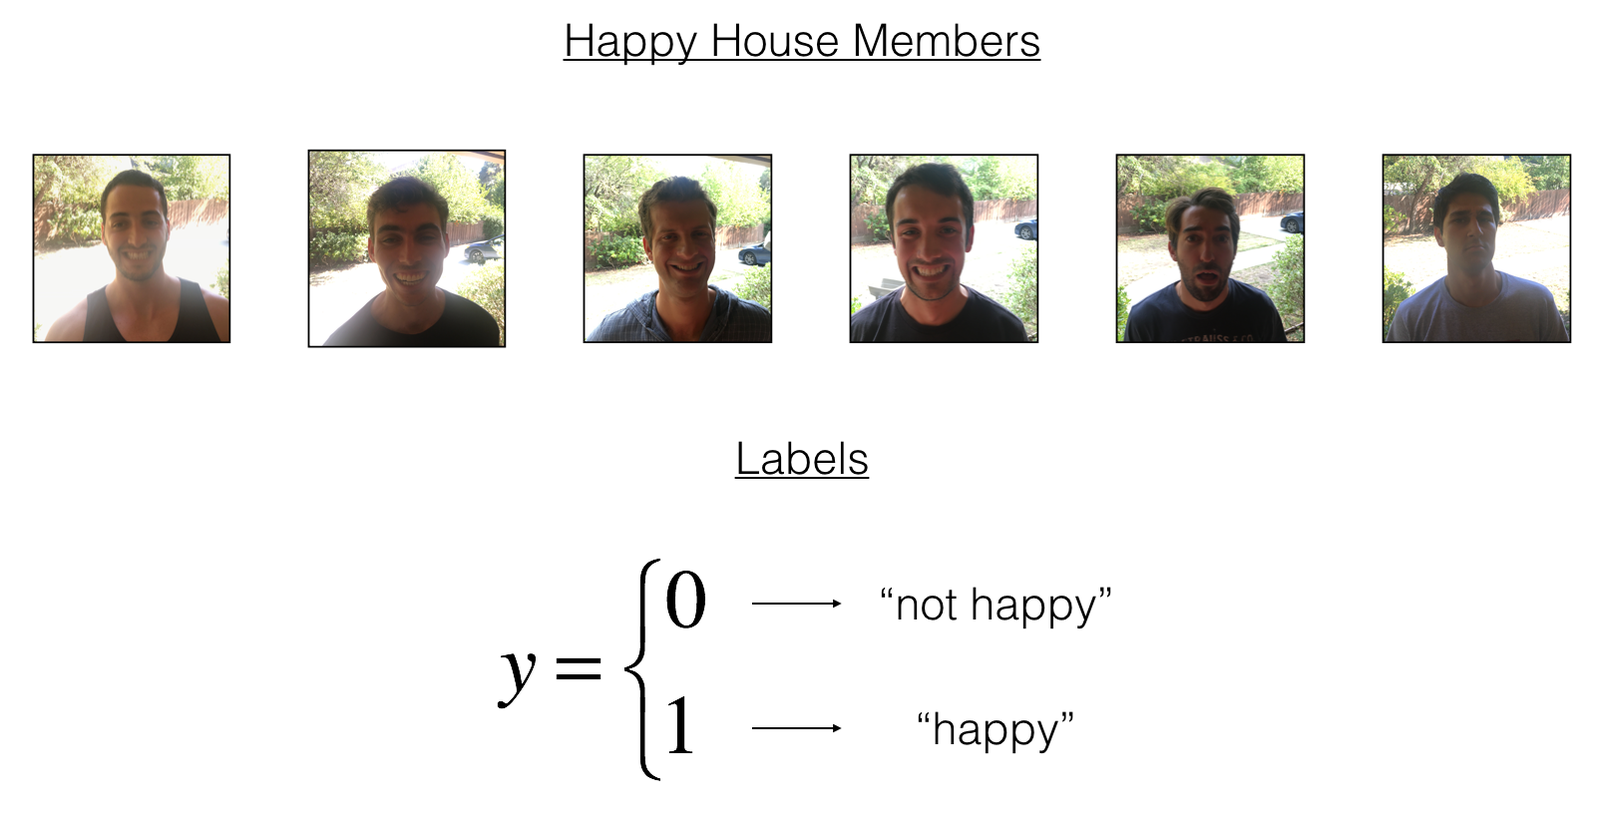

In [5]:
from IPython.display import Image, display
display(Image("Data/image_2_1_2_house-members.png", width=600))

In [9]:
train_path = "Data/train_happy.h5"
test_path = "Data/test_happy.h5"

In [7]:
def load_dataset(train_path, test_path):
    train_dataset = h5py.File(train_path, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(test_path, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [10]:
import h5py
train_path = 'Data/train_happy.h5'
test_path = 'Data/test_happy.h5'
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset(train_path, test_path)

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [13]:
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.

    Arguments:
    input_shape -- shape of the images of the dataset (e.g., (64, 64, 3))

    Returns:
    model -- a Model() instance in Keras
    """
    X_input = Input(input_shape)

    # Zero-padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Conv -> BatchNorm -> ReLU
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    # Max pooling
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # Flatten → Fully Connected Layer with Sigmoid
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

In [14]:
model = HappyModel((64, 64, 3))
model.summary()

Model: "HappyModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 70, 70, 3)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv0 (Conv2D)                  │ (None, 64, 64, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn0 (BatchNormalization)        │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool (MaxPooling2D)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
happyModel.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
happyModel.fit(x=X_train, y=Y_train, epochs=20, batch_size=100)

Epoch 1/20


2025-06-19 14:51:19.351035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.5383 - loss: 2.5942
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5645 - loss: 2.1599
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6660 - loss: 1.1296
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8210 - loss: 0.4909
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8365 - loss: 0.3262
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9147 - loss: 0.1883
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9243 - loss: 0.1825
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9658 - loss: 0.1312
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9636 - loss: 0.1290
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9575 - loss: 0.1178
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9637 - loss: 0.1071
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9591 - loss: 0.1245
Epoch 13/20


In [19]:
### START CODE HERE ###
preds = happyModel.evaluate(x=X_test, y=Y_test)
### END CODE HERE ###

print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6639 - loss: 0.4724
Loss = 0.4856109619140625
Test Accuracy = 0.6399999856948853


In [20]:
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model

def HappyModel(input_shape):
    X_input = Input(input_shape)

    # BLOCK 1: CONV -> BN -> RELU -> POOL
    X = Conv2D(32, (3, 3), strides=(1, 1), padding='same', name='conv1')(X_input)
    X = BatchNormalization(axis=3, name='bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2, 2), name='max_pool1')(X)

    # BLOCK 2: CONV -> BN -> RELU -> POOL
    X = Conv2D(64, (3, 3), strides=(1, 1), padding='same', name='conv2')(X)
    X = BatchNormalization(axis=3, name='bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2, 2), name='max_pool2')(X)

    # GLOBAL AVERAGE POOLING
    X = GlobalAveragePooling2D(name='gap')(X)

    # DROPOUT
    X = Dropout(0.4, name='dropout')(X)

    # FINAL DENSE
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Model
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

In [21]:
happyModel = HappyModel((64, 64, 3))
happyModel.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
happyModel.fit(X_train, Y_train, epochs=40, batch_size=16)

Epoch 1/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5087 - loss: 0.8239
Epoch 2/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5297 - loss: 0.7282
Epoch 3/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5714 - loss: 0.7130
Epoch 4/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5509 - loss: 0.6859
Epoch 5/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6039 - loss: 0.6392
Epoch 6/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6355 - loss: 0.6582
Epoch 7/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6870 - loss: 0.5917
Epoch 8/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6732 - loss: 0.6068
Epoch 9/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6176 - loss: 0.6368
Epoch 10/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6824 - loss: 0.6043
Epoch 11/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6607 - loss: 0.6044
Epoch 12/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy:

In [ ]:
preds = happyModel.evaluate(X_test, Y_test)
print("Loss =", preds[0])
print("Test Accuracy =", preds[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.8176 - loss: 0.4736
Loss = 0.46584829688072205
Test Accuracy = 0.8133333325386047


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


happyModel.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/100
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9312 - loss: 0.1873
Epoch 1: val_accuracy improved from -inf to 0.48333, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9316 - loss: 0.1870 - val_accuracy: 0.4833 - val_loss: 1.8027
Epoch 2/100
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9492 - loss: 0.1633
Epoch 2: val_accuracy improved from 0.48333 to 0.51667, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9489 - loss: 0.1638 - val_accuracy: 0.5167 - val_loss: 4.9484
Epoch 3/100
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9432 - loss: 0.1812
Epoch 3: val_accuracy improved from 0.51667 to 0.95000, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9430 - loss: 0.1811 - val_accuracy: 0.9500 - val_loss: 0.1172
Epoch 4/100
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9496 - loss: 0.1469
Epoch 4: val_accuracy did not improve from 0.95000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9483 - loss: 0.1482 - val_accuracy: 0.9333 - val_loss: 0.2546
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9628 - loss: 0.1319
Epoch 5: val_accuracy improved from 0.95000 to 0.96667, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9626 - loss: 0.1322 - val_accuracy: 0.9667 - val_loss: 0.1753
Epoch 6/100
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9410 - loss: 0.1676
Epoch 6: val_accuracy did not improve from 0.96667
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9412 - loss: 0.1674 - val_accuracy: 0.5333 - val_loss: 0.9318
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9605 - loss: 0.1454
Epoch 7: val_accuracy did not improve from 0.96667
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9597 - loss: 0.1461 - val_accuracy: 0.7000 - val_loss: 0.4632
Epoch 8/100
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9593 - loss: 0.1293
Epoch 8: val_accuracy did not improve from 0.96667
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9592 - loss: 0.1294 - val_accuracy: 0.7167 - val_loss: 0.5778


In [49]:
from keras.models import load_model

best_model = load_model('best_model.h5')

loss, accuracy = best_model.evaluate(X_test, Y_test)
print("Best Model Loss:", loss)
print("Best Model Accuracy:", accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9663 - loss: 0.1782
Best Model Loss: 0.17931289970874786
Best Model Accuracy: 0.9666666388511658


In [58]:
def load_dataset():
    train_dataset = h5py.File("data/train_happy.h5", "r")
    test_dataset = h5py.File("data/test_happy.h5", "r")

    X_train = np.array(train_dataset["train_set_x"][:])
    Y_train = np.array(train_dataset["train_set_y"][:])

    X_test = np.array(test_dataset["test_set_x"][:])
    Y_test = np.array(test_dataset["test_set_y"][:])

    Y_train = Y_train.reshape((1, Y_train.shape[0])).T
    Y_test = Y_test.reshape((1, Y_test.shape[0])).T

    return X_train, Y_train, X_test, Y_test

In [59]:
from keras.models import load_model
happyModel = load_model("best_model.h5")

X_train, Y_train, X_test, Y_test = load_dataset()

# Normalize data
X_train = X_train / 255.
X_test = X_test / 255.

loss, accuracy = happyModel.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9663 - loss: 0.1782
Test Loss: 0.17931289970874786
Test Accuracy: 0.9666666388511658


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


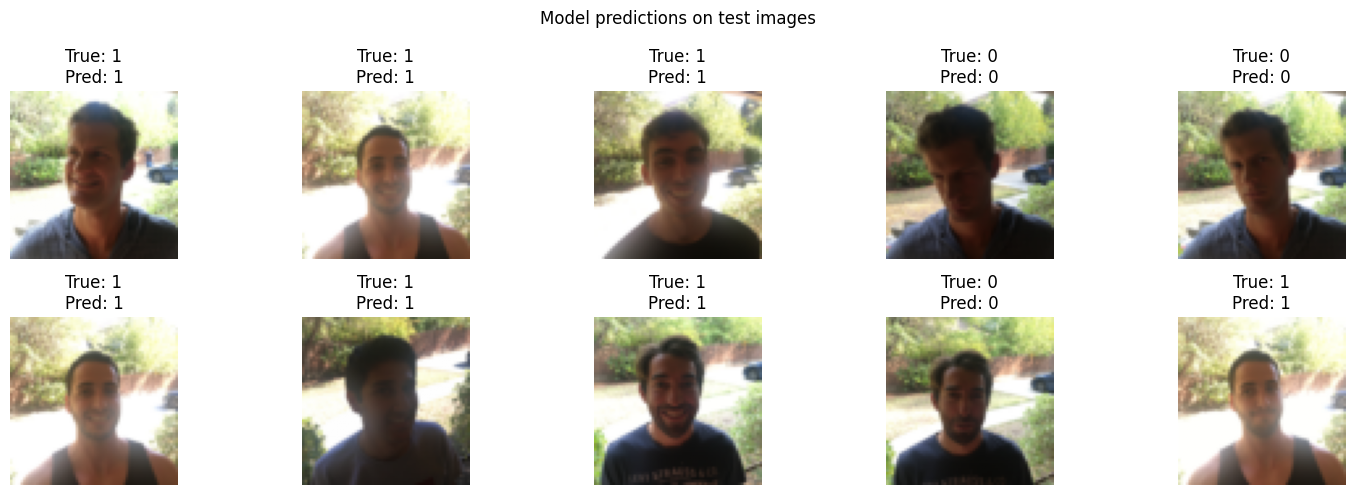

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = happyModel.predict(X_test)

# Convert probabilities to binary class labels
predicted_classes = (predictions > 0.5).astype("int32")

# Choose 10 random indices to visualize
random_indices = np.random.choice(X_test.shape[0], 10, replace=False)

# Plot the selected images with predictions and true labels
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    plt.title(f"True: {Y_test[idx][0]}\nPred: {predicted_classes[idx][0]}")
plt.suptitle("Model predictions on test images")
plt.tight_layout()
plt.show()

## Experimental Results and Conclusions

During this task, several convolutional neural network (CNN) architectures were tested to classify images of happy faces. The process included a baseline model, an improved version with regularization, and the use of callbacks to optimize performance.

---

### Experiment 1: Baseline CNN Model
- **Architecture:** Conv2D → BatchNorm → ReLU → MaxPooling → Flatten → Dense.
- **Epochs Trained:** 20  
- **Final Training Accuracy:** 99.23%  
- **Final Training Loss:** 0.0664  
- **Test Accuracy:** 63.99%  
- **Test Loss:** 0.4724  
- **Observation:** Strong overfitting — excellent training performance but poor generalization.

---

### Experiment 2: Improved CNN with Dropout and GAP
- **Architecture:** 2× Conv2D blocks → GlobalAveragePooling → Dropout(0.4) → Dense.
- **Epochs Trained:** 40  
- **Final Training Accuracy:** 79.06%  
- **Final Training Loss:** 0.4774  
- **Test Accuracy:** 81.76%  
- **Test Loss:** 0.4736  
- **Observation:** Better generalization and more stable learning compared to the baseline.

---

### Experiment 3: Callbacks (EarlyStopping + ModelCheckpoint)
- **Architecture:** Same as Experiment 2  
- **Epochs Trained:** 8 (stopped early from 100)  
- **Final Training Accuracy:** 96.28%  
- **Final Training Loss:** 0.1322  
- **Validation Accuracy (best):** 96.67%  
- **Validation Loss (best):** 0.1753  
- **Test Accuracy (Best Model):** **96.66%**  
- **Test Loss (Best Model):** 0.1793  
- **Observation:** Best result overall — callbacks captured the optimal model while preventing overfitting.

---

### Visualization of Predictions
- A random selection of 10 test images was visualized using the best-performing model.
- Each image was displayed with both the predicted and actual label.
- This helped evaluate how the model performs on real examples and confirmed its strong generalization ability

---

### Conclusion:

The experiments clearly demonstrate that:
- Regularization techniques (Dropout, GAP) help reduce overfitting.
- Callbacks (EarlyStopping, ModelCheckpoint) enable efficient and stable training.
- The final model achieved **96.66% test accuracy**, a significant improvement over the baseline (~64%).

This iterative experimental process highlights the importance of architectural tuning and training strategies in deep learning.